<h3 align="center">Attrition Analysis</h3> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("general_data.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### Checking null values:

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

- since there is null values in NumCompaniesWorked and TotalWorkingYears and it is float value fill it with mean 


### Filling with mean values:

In [6]:
df["NumCompaniesWorked"].fillna(df['NumCompaniesWorked'].median(),inplace=True)
df["TotalWorkingYears"].fillna(df['TotalWorkingYears'].mean(),inplace=True)

In [7]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

### Visualization:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A175166A48>,
      dtype=object)

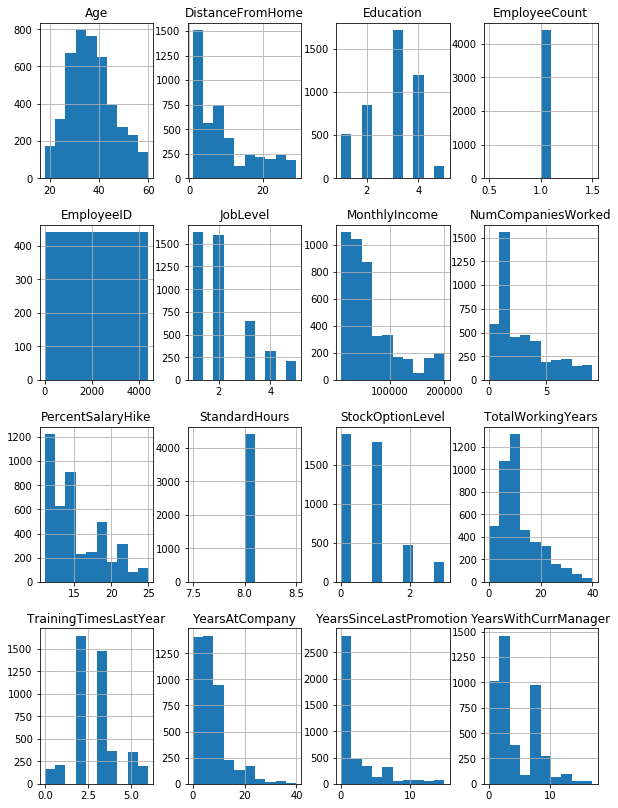

In [8]:
df.hist(figsize=(10,14))

#### Inference:

- EmployeeId,StandardHours,EmployeeID are irrelevant columns
- Education,JobLevel,StockOptionLevel,TrainingTimesLastYear are categorical but in encoded way

### Finding outliers using Boxplot:

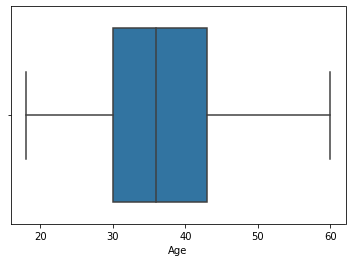

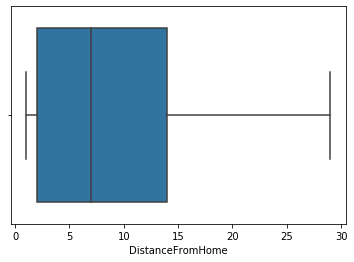

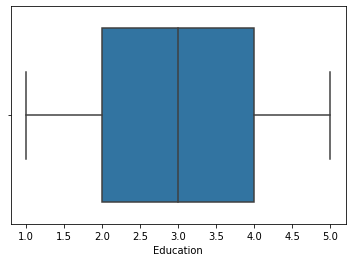

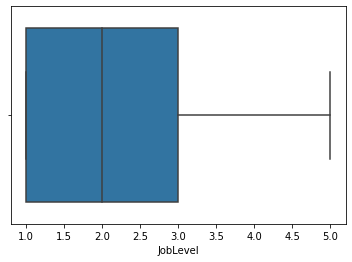

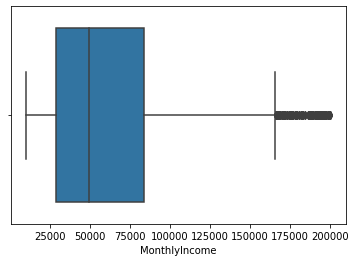

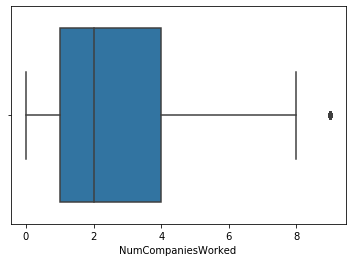

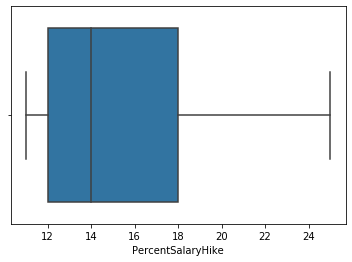

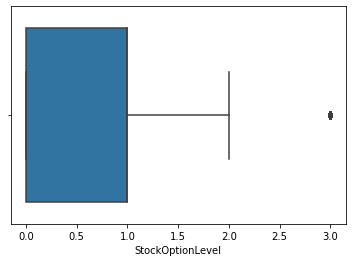

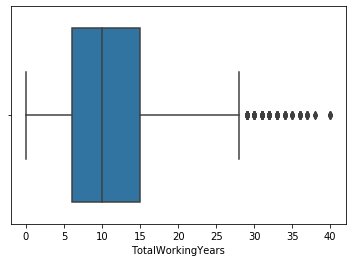

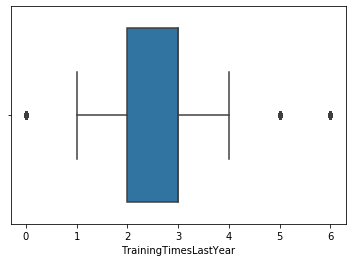

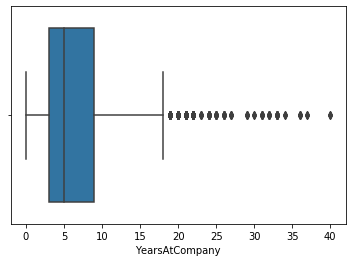

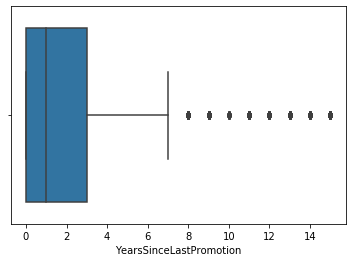

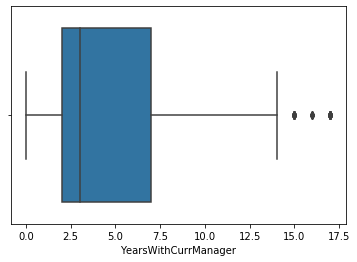

In [9]:
col = ['Age', 'DistanceFromHome', 'Education','JobLevel','MonthlyIncome', 
       'NumCompaniesWorked', 'PercentSalaryHike','StockOptionLevel',
       'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']

for i in col:
    sns.boxplot(df[i])
    plt.show()

### Inference:

- Age,DistanceFromHome,Education,JobLevel,PercentSaLaryHike has no outliers
- YearsWithCurrManager,TrainingTimesLastYear,StockOptionLevel,NumCompaniesWorked has few outliers
- YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears has moderate outliers
- MonthlyIncome has more outliers

### Drop irrelevant columns:

In [10]:
df=df.drop(['EmployeeID','EmployeeCount','StandardHours','Over18'],axis=1)

### Converting text into categorical form:

In [11]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Attrition']=lab.fit_transform(df['Attrition'])
df['BusinessTravel']=lab.fit_transform(df['BusinessTravel'])
df['Department'] = lab.fit_transform(df['Department'])
df['MaritalStatus'] = lab.fit_transform(df['MaritalStatus'])
df['JobRole'] = lab.fit_transform(df['JobRole'])
df['Gender'] = lab.fit_transform(df['Gender'])
df['EducationField'] = lab.fit_transform(df['EducationField'])

In [13]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.000000,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.000000,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.000000,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.000000,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.000000,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,0,1,6,2,60290,3.0,17,1,10.000000,5,3,0,2
4406,29,0,2,1,2,4,3,1,1,2,0,26790,2.0,15,0,10.000000,2,3,0,2
4407,25,0,2,1,25,2,1,1,2,7,1,37020,0.0,20,0,5.000000,4,4,1,2
4408,42,0,2,2,18,2,3,1,1,2,0,23980,0.0,14,1,10.000000,2,9,7,8


### train dataset:

y=df.iloc[:,1:2]
y

In [15]:
x=df.drop(['Attrition'],axis=1)

In [17]:
x.shape

(4410, 19)

### Applying decisionTree:

In [29]:
tree_model=DecisionTreeClassifier(max_depth=40)

In [30]:
tree_model.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
tree_model.score(x,y)

1.0

- accuracy is 100% means it leads to overfitting of model

### Applying RandomForest:

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)
rf_model.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rf_model.oob_score_

0.9997732426303855

### Finding more relevant columns:

In [35]:
a=['Age', 'BusinessTravel', 'Department', 'DistanceFromHome','Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager']
for feature,imp in zip(a,rf_model.feature_importances_):
    print(feature ,':',imp);

Age : 0.09716798195172525
BusinessTravel : 0.028246683849221303
Department : 0.025717258039609853
DistanceFromHome : 0.06999458985636133
Education : 0.04060625107225195
EducationField : 0.040548604412321464
Gender : 0.018719635956010436
JobLevel : 0.03833709571415896
JobRole : 0.0559425266167584
MaritalStatus : 0.039392210911087314
MonthlyIncome : 0.09382489433304324
NumCompaniesWorked : 0.056165419739384104
PercentSalaryHike : 0.06618547885233268
StockOptionLevel : 0.034124560921907965
TotalWorkingYears : 0.08520746028159105
TrainingTimesLastYear : 0.04496356659907785
YearsAtCompany : 0.06870762855876836
YearsSinceLastPromotion : 0.04362740228107619
YearsWithCurrManager : 0.05252075005331221


### Inference:

- Age, DistanceFromHome, MonthlyIncome, PercentSalaryHike, TotalWorkingYears, YearsAtCompany have value more than 0.05 ie, They are Important feature and affect the prediction of Attrition

### Splitting dataset with important features:

In [36]:
imp=df[['Age', 'DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']]

In [37]:
imp.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany
0,51,6,131160,11,1.0,1
1,31,10,41890,23,6.0,5
2,32,17,193280,15,5.0,5
3,38,2,83210,11,13.0,8
4,32,10,23420,12,9.0,6


In [38]:
tree_model=DecisionTreeClassifier(max_depth=12)
tree_model.fit(imp,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Creating decisionTree:

In [40]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [43]:
with open('attrition.dot','w') as f:
    f = tree.export_graphviz(tree_model, feature_names=['Age', 'DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany'], out_file=f);

### Predicting score:

In [45]:
tree_model.score(imp,y)

0.9480725623582766

### Fitting in randomforest:

In [46]:
rf_model.fit(imp,y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
rf_model.oob_score_

0.999546485260771

### Inference:


- dataset is not overfitted as in case of all columns